<a href="https://colab.research.google.com/github/Muhammed-Firoz/ANN_on_mnist_dataset/blob/main/ANN_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
from tensorflow.keras.datasets import mnist #handwitten digit dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Load the dataset

(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#change datatype
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [ ]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# convert output to function of 0 and 1
from keras.utils import np_utils

In [ ]:
y_train=np_utils.to_categorical(y_train,num_classes=10)
y_test=np_utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#Build the architecture
#2 hidden layer, 512,relu,softmax
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))#first hiddden layer
model.add(Dense(512,activation='relu'))#second hidden layer

#output layer
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary() ## summary of architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#cross entropy method for classification problems

In [ ]:
#parameters
batch_size=128
epochs=20

In [ ]:
#fit model

history=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.2225 - accuracy: 0.9341 - val_loss: 0.1040 - val_accuracy: 0.9681
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0803 - accuracy: 0.9753 - val_loss: 0.0774 - val_accuracy: 0.9752
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0531 - accuracy: 0.9830 - val_loss: 0.0755 - val_accuracy: 0.9759
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0765 - val_accuracy: 0.9772
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0794 - val_accuracy: 0.9766
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0763 - val_accuracy: 0.9797
Epoch 7/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0927 - val_accuracy: 0.9753

In [ ]:
#score
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1037 - accuracy: 0.9815


[0.10367075353860855, 0.9815000295639038]

313 is because the batch size is by default 32 and 10000 observation in test data

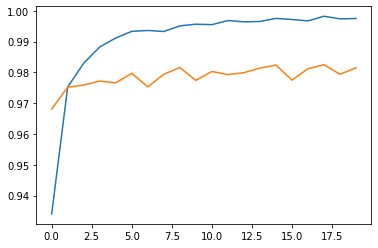

In [ ]:
#plotting the accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

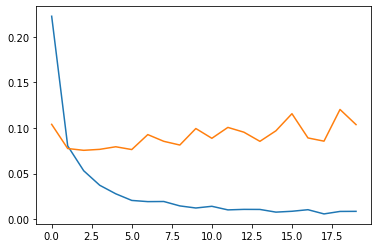

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])